# Clase - Computación Distribuida

## Pyspark Hands-on 
#### Marcelo Medel Vergara - Diplomado Data Engineer USACH


### Carpeta con archivos del notebook

https://drive.google.com/drive/u/0/folders/1oo_mXiNupXHqNmdcdKfliKPSoLxlN8No

### Read / Write datos desde múltiples fuentes de datos
<!-- insert url -->

Documentación de referencia: https://spark.apache.org/docs/3.5.2/api/python/reference/pyspark.sql/io.html

- `pyspark.sql.SparkSession.read`
- `pyspark.sql.DataFrameWriter`

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("hands-on-2").getOrCreate()

spark.active()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/21 19:30:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
path_csv = "data/2015-summary.csv"

df = spark.read.csv(path_csv, header=True, sep=",", inferSchema=True)
df.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

In [5]:
path_json = "data/2015-summary-wr.json"

df.write.json(path_json, mode="overwrite") # mode = ["append","overwrite","ignore","error"]



In [9]:
spark.read.json(path_json).show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
+-----------------+-------------------+-----+
only showing top 5 rows



In [14]:
path_txt = "data/Don-Quijote.txt"
spark.read.text(path_txt).show()

+--------------------+
|               value|
+--------------------+
|The Project Guten...|
|                    |
|This ebook is for...|
|most other parts ...|
|whatsoever. You m...|
|of the Project Gu...|
|at www.gutenberg....|
|you will have to ...|
|before using this...|
|                    |
|  Title: Don Quijote|
|                    |
|Author: Miguel de...|
|                    |
|Release date: Dec...|
|                M...|
|                    |
|   Language: Spanish|
|                    |
|Credits: an anony...|
+--------------------+
only showing top 20 rows



In [8]:
spark.read.format("json").load(path_json).show(5)


+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
+-----------------+-------------------+-----+
only showing top 5 rows



In [12]:
spark.read.format("csv").load(path_csv).show(5)

+-----------------+-------------------+-----+
|              _c0|                _c1|  _c2|
+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
+-----------------+-------------------+-----+
only showing top 5 rows



In [17]:
df = spark.read.parquet("data/linkedin.parquet")
df.show(1, vertical=True, truncate=False)

-RECORD 0--------------------------------------------------
 job_id                     | 2148434586                   
 company_id                 | 2780388.0                    
 title                      | Manager, Salesforce Platform 
 min_salary                 | 98640.0                      
 pay_period                 | YEARLY                       
 formatted_work_type        | Full-time                    
 location                   | New Hampshire, United States 
 applies                    | 0.0                          
 remote_allowed             | 0.0                          
 views                      | 0.0                          
 formatted_experience_level | Mid-Senior level             
 sponsored                  | 0                            
 company_size               | 5.0                          
 industry                   | Real Estate                  
 employee_count             | 1132.0                       
 follower_count             | 29459.0   

In [18]:
df.printSchema()

root
 |-- job_id: long (nullable = true)
 |-- company_id: double (nullable = true)
 |-- title: string (nullable = true)
 |-- min_salary: double (nullable = true)
 |-- pay_period: string (nullable = true)
 |-- formatted_work_type: string (nullable = true)
 |-- location: string (nullable = true)
 |-- applies: double (nullable = true)
 |-- remote_allowed: double (nullable = true)
 |-- views: double (nullable = true)
 |-- formatted_experience_level: string (nullable = true)
 |-- sponsored: integer (nullable = true)
 |-- company_size: double (nullable = true)
 |-- industry: string (nullable = true)
 |-- employee_count: double (nullable = true)
 |-- follower_count: double (nullable = true)



### Data Type Conversion


In [23]:
from pyspark.sql.functions import col
from pyspark.sql.types import StringType, IntegerType, BooleanType

df = df.withColumn("job_id", col("job_id").cast(StringType()))
df = df.withColumn("company_id", col("company_id").cast(StringType()))
df = df.withColumn("min_salary", col("min_salary").cast(IntegerType()))
df = df.withColumn("sponsored", col("sponsored").cast(BooleanType()))

df.printSchema()

root
 |-- job_id: string (nullable = true)
 |-- company_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- min_salary: integer (nullable = true)
 |-- pay_period: string (nullable = true)
 |-- formatted_work_type: string (nullable = true)
 |-- location: string (nullable = true)
 |-- applies: double (nullable = true)
 |-- remote_allowed: double (nullable = true)
 |-- views: double (nullable = true)
 |-- formatted_experience_level: string (nullable = true)
 |-- sponsored: boolean (nullable = true)
 |-- company_size: double (nullable = true)
 |-- industry: string (nullable = true)
 |-- employee_count: double (nullable = true)
 |-- follower_count: double (nullable = true)



In [26]:
df.show(truncate=False)

+----------+-----------+--------------------------------------------------+----------+----------+-------------------+----------------------------+-------+--------------+-----+--------------------------+---------+------------+----------------------------------+--------------+--------------+
|job_id    |company_id |title                                             |min_salary|pay_period|formatted_work_type|location                    |applies|remote_allowed|views|formatted_experience_level|sponsored|company_size|industry                          |employee_count|follower_count|
+----------+-----------+--------------------------------------------------+----------+----------+-------------------+----------------------------+-------+--------------+-----+--------------------------+---------+------------+----------------------------------+--------------+--------------+
|2148434586|2780388.0  |Manager, Salesforce Platform                      |98640     |YEARLY    |Full-time          |New Hampsh

### String Manipulation



In [28]:
from pyspark.sql.functions import substring, concat, lower, upper, split 

df = df.withColumn("pay_period", substring(df.pay_period, 1, 1))


In [34]:
from pyspark.sql.functions import lit
df.withColumn("title_extended", lower(concat(df.formatted_experience_level, lit(" - "), df.title))).show(1, truncate=False, vertical=True)
df.withColumn("title_extended", upper(concat(df.formatted_experience_level, lit(" - "), df.title))).show(1, truncate=False, vertical=True)

-RECORD 0---------------------------------------------------------------------
 job_id                     | 2148434586                                      
 company_id                 | 2780388.0                                       
 title                      | Manager, Salesforce Platform                    
 min_salary                 | 98640                                           
 pay_period                 | Y                                               
 formatted_work_type        | Full-time                                       
 location                   | New Hampshire, United States                    
 applies                    | 0.0                                             
 remote_allowed             | 0.0                                             
 views                      | 0.0                                             
 formatted_experience_level | Mid-Senior level                                
 sponsored                  | false                 

In [41]:
df = df.withColumn("location2", split(col("location"), ","))
df.select(df.location2[0].alias("ciudad"), df.location2[1].alias("estado")).show()


+--------------------+--------------+
|              ciudad|        estado|
+--------------------+--------------+
|       New Hampshire| United States|
|           San Diego|            CA|
|             Spokane|            WA|
|             Spokane|            WA|
|            Puyallup|            WA|
|       United States|          NULL|
|         San Gabriel|            CA|
|San Francisco Bay...|          NULL|
|       United States|          NULL|
|             Chicago|            IL|
|            McKinney|            TX|
|             Buffalo|            NY|
|               Largo|            FL|
|            Quantico|            VA|
|            Manassas|            VA|
|          Minnetonka|            MN|
|       San Francisco|            CA|
|               Tempe|            AZ|
|          Fort Worth|            TX|
|              Tucson|            AZ|
+--------------------+--------------+
only showing top 20 rows



### Working with Dates


In [43]:
from pyspark.sql.types import StructType, StructField, StringType

data_dates = [
    ("A", "2023-01-01"),
    ("B", "2021-02-23"),
    ("C", "2019-10-23"),
    ("E", "2020-11-30")
]

schema = StructType([
    StructField("tipo", StringType()),
    StructField("fecha", StringType()),
])

df_dates = spark.createDataFrame(data_dates, schema)
df_dates.show()

+----+----------+
|tipo|     fecha|
+----+----------+
|   A|2023-01-01|
|   B|2021-02-23|
|   C|2019-10-23|
|   E|2020-11-30|
+----+----------+



In [57]:
from pyspark.sql.functions import to_date, date_format, current_date, datediff
df_dates = df_dates.withColumn("fecha_dt", to_date(col("fecha"), "yyyy-MM-dd"))
df_dates.printSchema()
df_dates.show(2)

root
 |-- tipo: string (nullable = true)
 |-- fecha: string (nullable = true)
 |-- fecha_dt: date (nullable = true)
 |-- format_dt: string (nullable = true)
 |-- format_dt2: string (nullable = true)

+----+----------+----------+----------+----------+
|tipo|     fecha|  fecha_dt| format_dt|format_dt2|
+----+----------+----------+----------+----------+
|   A|2023-01-01|2023-01-01|01/01/2023|01/01/2023|
|   B|2021-02-23|2021-02-23|02/23/2021|02/23/2021|
+----+----------+----------+----------+----------+
only showing top 2 rows



In [54]:
df_dates = df_dates.withColumn("format_dt", date_format(col("fecha_dt"), "MM/dd/yyyy"))
df_dates = df_dates.withColumn("format_dt2", date_format(col("fecha"), "MM/dd/yyyy"))
df_dates.printSchema()

root
 |-- tipo: string (nullable = true)
 |-- fecha: string (nullable = true)
 |-- fecha_dt: date (nullable = true)
 |-- format_dt: string (nullable = true)
 |-- format_dt2: string (nullable = true)



In [55]:
df_dates.show()

+----+----------+----------+----------+----------+
|tipo|     fecha|  fecha_dt| format_dt|format_dt2|
+----+----------+----------+----------+----------+
|   A|2023-01-01|2023-01-01|01/01/2023|01/01/2023|
|   B|2021-02-23|2021-02-23|02/23/2021|02/23/2021|
|   C|2019-10-23|2019-10-23|10/23/2019|10/23/2019|
|   E|2020-11-30|2020-11-30|11/30/2020|11/30/2020|
+----+----------+----------+----------+----------+



In [58]:
df_dates.withColumn("diff_days", datediff(current_date(),col("fecha_dt"))).show()

+----+----------+----------+----------+----------+---------+
|tipo|     fecha|  fecha_dt| format_dt|format_dt2|diff_days|
+----+----------+----------+----------+----------+---------+
|   A|2023-01-01|2023-01-01|01/01/2023|01/01/2023|      598|
|   B|2021-02-23|2021-02-23|02/23/2021|02/23/2021|     1275|
|   C|2019-10-23|2019-10-23|10/23/2019|10/23/2019|     1764|
|   E|2020-11-30|2020-11-30|11/30/2020|11/30/2020|     1360|
+----+----------+----------+----------+----------+---------+



In [64]:
from pyspark.sql.functions import year, month, dayofmonth, dayofweek, date_add, date_sub

df_dates.withColumn("dayofweek", dayofweek(col("fecha_dt"))).show()
df_dates.withColumn("dayofmonth", dayofmonth(col("fecha_dt"))).show()
df_dates.withColumn("year", year(col("fecha_dt"))).show()
df_dates.withColumn("month", month(col("fecha_dt"))).show()

df_dates.withColumn("date_plus7", date_add(col("fecha_dt"),7)).show()
df_dates.withColumn("date_minus7", date_sub(col("fecha_dt"),7)).show()

+----+----------+----------+----------+----------+---------+
|tipo|     fecha|  fecha_dt| format_dt|format_dt2|dayofweek|
+----+----------+----------+----------+----------+---------+
|   A|2023-01-01|2023-01-01|01/01/2023|01/01/2023|        1|
|   B|2021-02-23|2021-02-23|02/23/2021|02/23/2021|        3|
|   C|2019-10-23|2019-10-23|10/23/2019|10/23/2019|        4|
|   E|2020-11-30|2020-11-30|11/30/2020|11/30/2020|        2|
+----+----------+----------+----------+----------+---------+

+----+----------+----------+----------+----------+----------+
|tipo|     fecha|  fecha_dt| format_dt|format_dt2|dayofmonth|
+----+----------+----------+----------+----------+----------+
|   A|2023-01-01|2023-01-01|01/01/2023|01/01/2023|         1|
|   B|2021-02-23|2021-02-23|02/23/2021|02/23/2021|        23|
|   C|2019-10-23|2019-10-23|10/23/2019|10/23/2019|        23|
|   E|2020-11-30|2020-11-30|11/30/2020|11/30/2020|        30|
+----+----------+----------+----------+----------+----------+

+----+--------

In [74]:
from pyspark.sql.functions import current_timestamp, date_trunc

df = spark.range(1)
df.select(current_timestamp()).show(truncate=False)

df.select(date_trunc('mm', current_timestamp())).show()

+-----------------------+
|current_timestamp()    |
+-----------------------+
|2024-08-21 20:32:12.808|
+-----------------------+

+-----------------------------------+
|date_trunc(mm, current_timestamp())|
+-----------------------------------+
|                2024-08-01 00:00:00|
+-----------------------------------+



### Handling Missing Data



In [75]:
data = [
    ("F", 40, "La Serena", "2023-05-12"),
    ("G", None, "Antofagasta", "2022-09-18"),
    ("H", 27, None, "2023-02-14"),
    (None, 33, "Temuco", "2021-08-25"),
    ("J", 29, "Talca", None),
    ("K", 36, "Rancagua", "2023-04-01"),
    (None, None, "Chillán", None),
    ("M", 22, None, "2022-10-20"),
    ("N", None, "Osorno", "2021-12-05"),
    ("O", 31, None, None)
]

schema = StructType([
    StructField("tipo", StringType()),
    StructField("costo", IntegerType()),
    StructField("ciudad", StringType()),
    StructField("desde", StringType())
])

df = spark.createDataFrame(data, schema)
df.show()

+----+-----+-----------+----------+
|tipo|costo|     ciudad|     desde|
+----+-----+-----------+----------+
|   F|   40|  La Serena|2023-05-12|
|   G| NULL|Antofagasta|2022-09-18|
|   H|   27|       NULL|2023-02-14|
|NULL|   33|     Temuco|2021-08-25|
|   J|   29|      Talca|      NULL|
|   K|   36|   Rancagua|2023-04-01|
|NULL| NULL|    Chillán|      NULL|
|   M|   22|       NULL|2022-10-20|
|   N| NULL|     Osorno|2021-12-05|
|   O|   31|       NULL|      NULL|
+----+-----+-----------+----------+



In [78]:
df.dropna(how="any").show() # how = ["all","any"]

+----+-----+---------+----------+
|tipo|costo|   ciudad|     desde|
+----+-----+---------+----------+
|   F|   40|La Serena|2023-05-12|
|   K|   36| Rancagua|2023-04-01|
+----+-----+---------+----------+



In [82]:
df.dropna(thresh=4).show()

+----+-----+---------+----------+
|tipo|costo|   ciudad|     desde|
+----+-----+---------+----------+
|   F|   40|La Serena|2023-05-12|
|   K|   36| Rancagua|2023-04-01|
+----+-----+---------+----------+



In [84]:
df.dropna(subset=["tipo","ciudad","desde"]).show()

+----+-----+-----------+----------+
|tipo|costo|     ciudad|     desde|
+----+-----+-----------+----------+
|   F|   40|  La Serena|2023-05-12|
|   G| NULL|Antofagasta|2022-09-18|
|   K|   36|   Rancagua|2023-04-01|
|   N| NULL|     Osorno|2021-12-05|
+----+-----+-----------+----------+



In [86]:
df = df.fillna({
    "tipo":"NN",
    "costo":0,
    "ciudad":"desconocido",
    "desde":"9999-12-31"
})
df.show()

+----+-----+-----------+----------+
|tipo|costo|     ciudad|     desde|
+----+-----+-----------+----------+
|   F|   40|  La Serena|2023-05-12|
|   G|    0|Antofagasta|2022-09-18|
|   H|   27|desconocido|2023-02-14|
|  NN|   33|     Temuco|2021-08-25|
|   J|   29|      Talca|9999-12-31|
|   K|   36|   Rancagua|2023-04-01|
|  NN|    0|    Chillán|9999-12-31|
|   M|   22|desconocido|2022-10-20|
|   N|    0|     Osorno|2021-12-05|
|   O|   31|desconocido|9999-12-31|
+----+-----+-----------+----------+



### Aggregation and Grouping

In [97]:
from pyspark.sql.functions import avg, sum, count, countDistinct, max, median, stddev, variance, min

df = spark.read.parquet("data/linkedin.parquet")
df.show()

+----------+-----------+--------------------+----------+----------+-------------------+--------------------+-------+--------------+-----+--------------------------+---------+------------+--------------------+--------------+--------------+
|    job_id| company_id|               title|min_salary|pay_period|formatted_work_type|            location|applies|remote_allowed|views|formatted_experience_level|sponsored|company_size|            industry|employee_count|follower_count|
+----------+-----------+--------------------+----------+----------+-------------------+--------------------+-------+--------------+-----+--------------------------+---------+------------+--------------------+--------------+--------------+
|2148434586|  2780388.0|Manager, Salesfor...|   98640.0|    YEARLY|          Full-time|New Hampshire, Un...|    0.0|           0.0|  0.0|          Mid-Senior level|        0|         5.0|         Real Estate|        1132.0|       29459.0|
|2148434616|    15564.0|Lead Solar Mainte...

In [88]:
df.printSchema()

root
 |-- job_id: long (nullable = true)
 |-- company_id: double (nullable = true)
 |-- title: string (nullable = true)
 |-- min_salary: double (nullable = true)
 |-- pay_period: string (nullable = true)
 |-- formatted_work_type: string (nullable = true)
 |-- location: string (nullable = true)
 |-- applies: double (nullable = true)
 |-- remote_allowed: double (nullable = true)
 |-- views: double (nullable = true)
 |-- formatted_experience_level: string (nullable = true)
 |-- sponsored: integer (nullable = true)
 |-- company_size: double (nullable = true)
 |-- industry: string (nullable = true)
 |-- employee_count: double (nullable = true)
 |-- follower_count: double (nullable = true)



In [98]:
from pyspark.sql.functions import round
df.filter(col("pay_period")=="YEARLY")\
    .groupBy("formatted_experience_level")\
    .agg(
        round(avg("min_salary"),0).alias("avg_min_salary"),
        round(max("min_salary"),0).alias("max_min_salary"),
        round(min("min_salary"),0).alias("min_min_salary"),
        round(median("min_salary"),0).alias("median_min_salary"),
        round(stddev("min_salary"),0).alias("stddev_min_salary"),
        count("job_id").alias("q_job"),
        countDistinct("industry").alias("qd_industry"),
        sum("applies").alias("sum_applies")
        
    )\
    .orderBy("q_job", ascending=False)\
    .show()

+--------------------------+--------------+--------------+--------------+-----------------+-----------------+-----+-----------+-----------+
|formatted_experience_level|avg_min_salary|max_min_salary|min_min_salary|median_min_salary|stddev_min_salary|q_job|qd_industry|sum_applies|
+--------------------------+--------------+--------------+--------------+-----------------+-----------------+-----+-----------+-----------+
|          Mid-Senior level|      101333.0|      750000.0|          15.0|          94500.0|          44315.0| 1378|         78|    27018.0|
|               Entry level|       70942.0|      220000.0|          16.0|          61422.0|          33103.0|  475|         65|     5793.0|
|                 Associate|       81676.0|      225000.0|          18.0|          70064.0|          37978.0|  314|         54|     7722.0|
|                  Director|      143480.0|      350000.0|         120.0|         140000.0|          46022.0|  201|         49|     5524.0|
|                 Ex

### Joining DataFrames

In [107]:
df_jobs = spark.read.parquet("data/linkedin/job_postings.parquet")

In [117]:
df_jobs.show(5)

+---------+-----------+--------------------+----------+----------+----------+----------+-------------------+-----------------+-------+--------------------+--------------+-----+--------------------+---------------+------------------+-------+-----------+--------------------------+-----------+-----------+--------------+---------+---------+--------+-----------------+
|   job_id| company_id|               title|max_salary|med_salary|min_salary|pay_period|formatted_work_type|         location|applies|original_listed_time|remote_allowed|views|     job_posting_url|application_url|  application_type| expiry|closed_time|formatted_experience_level|skills_desc|listed_time|posting_domain|sponsored|work_type|currency|compensation_type|
+---------+-----------+--------------------+----------+----------+----------+----------+-------------------+-----------------+-------+--------------------+--------------+-----+--------------------+---------------+------------------+-------+-----------+----------------

In [118]:
!pip install missingno

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 1.1 MB/s eta 0:00:0000:0100:010m


<Axes: >

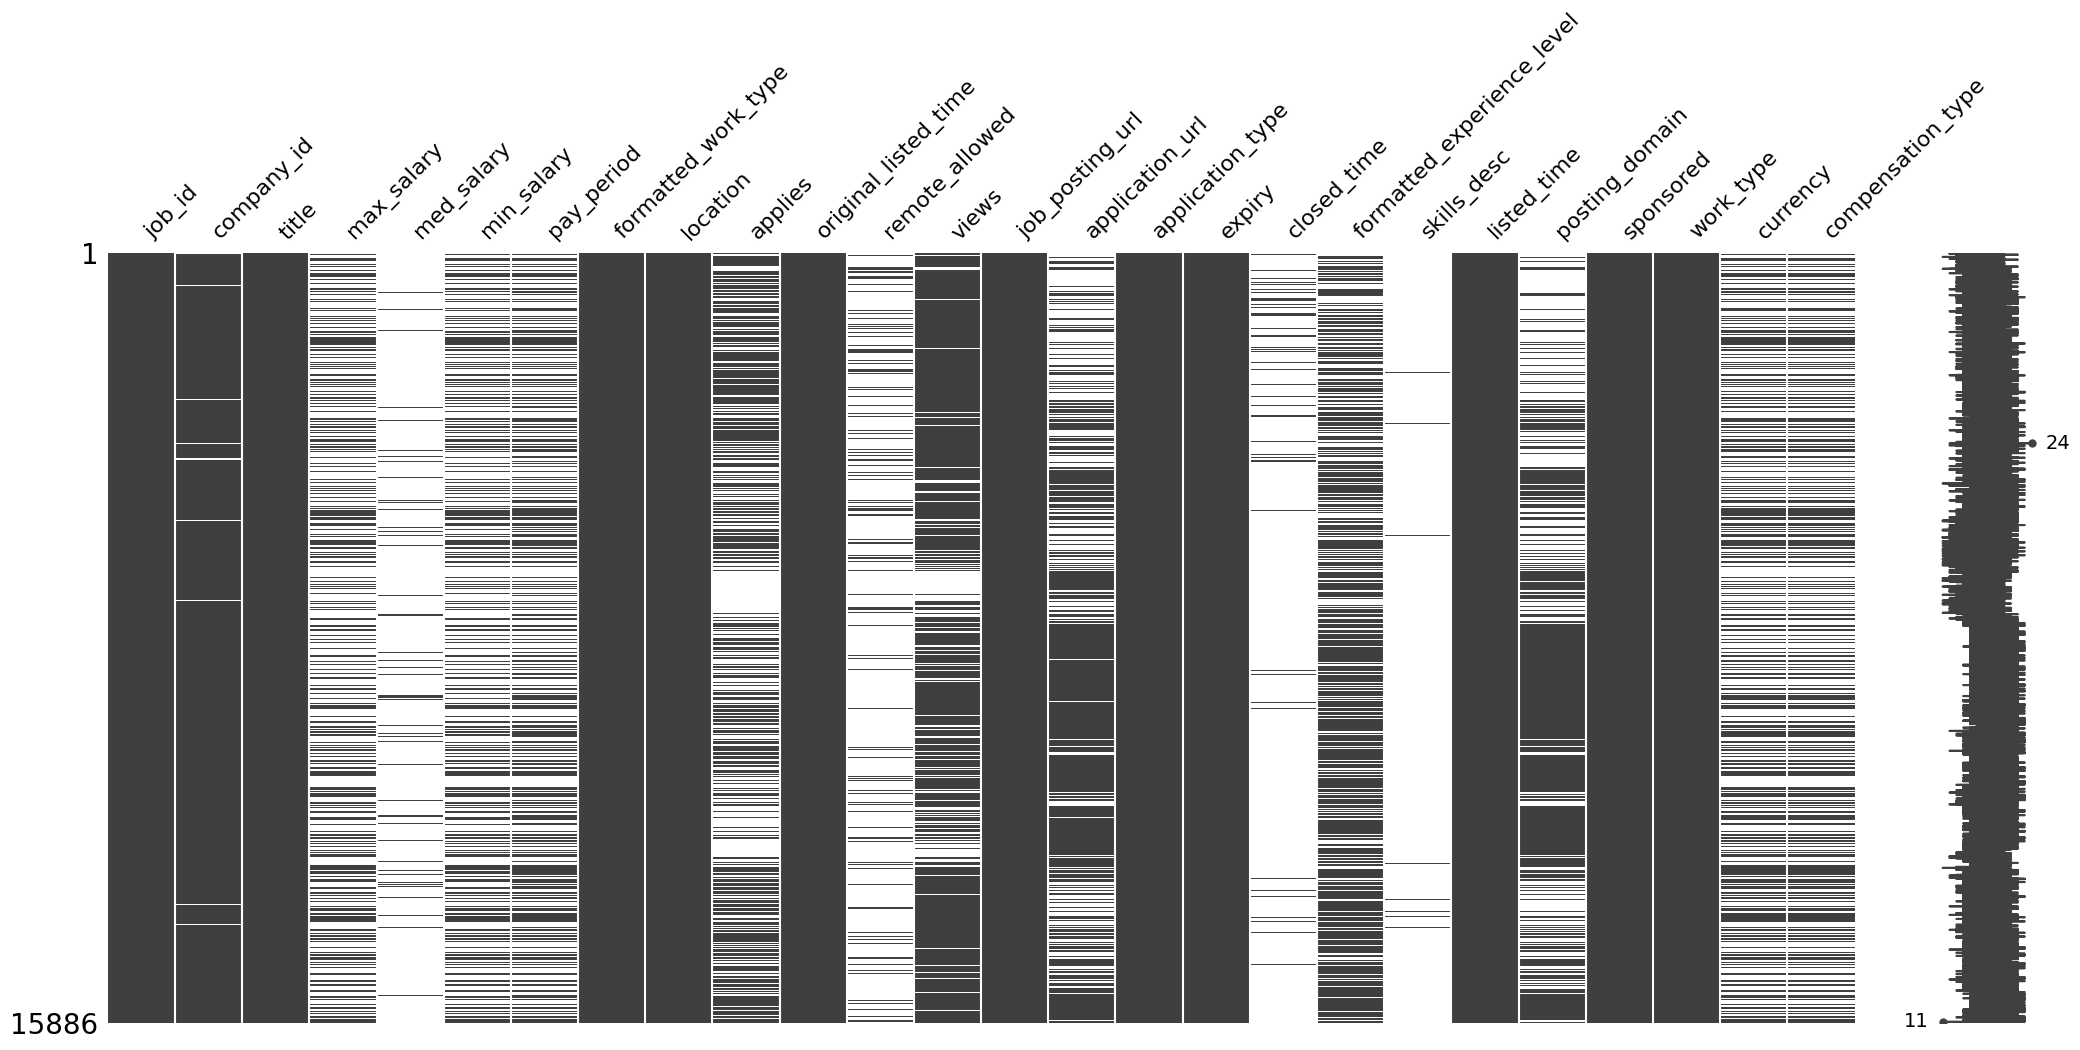

In [121]:
import missingno as msno
%matplotlib inline
msno.matrix(df_jobs.toPandas())

<Axes: >

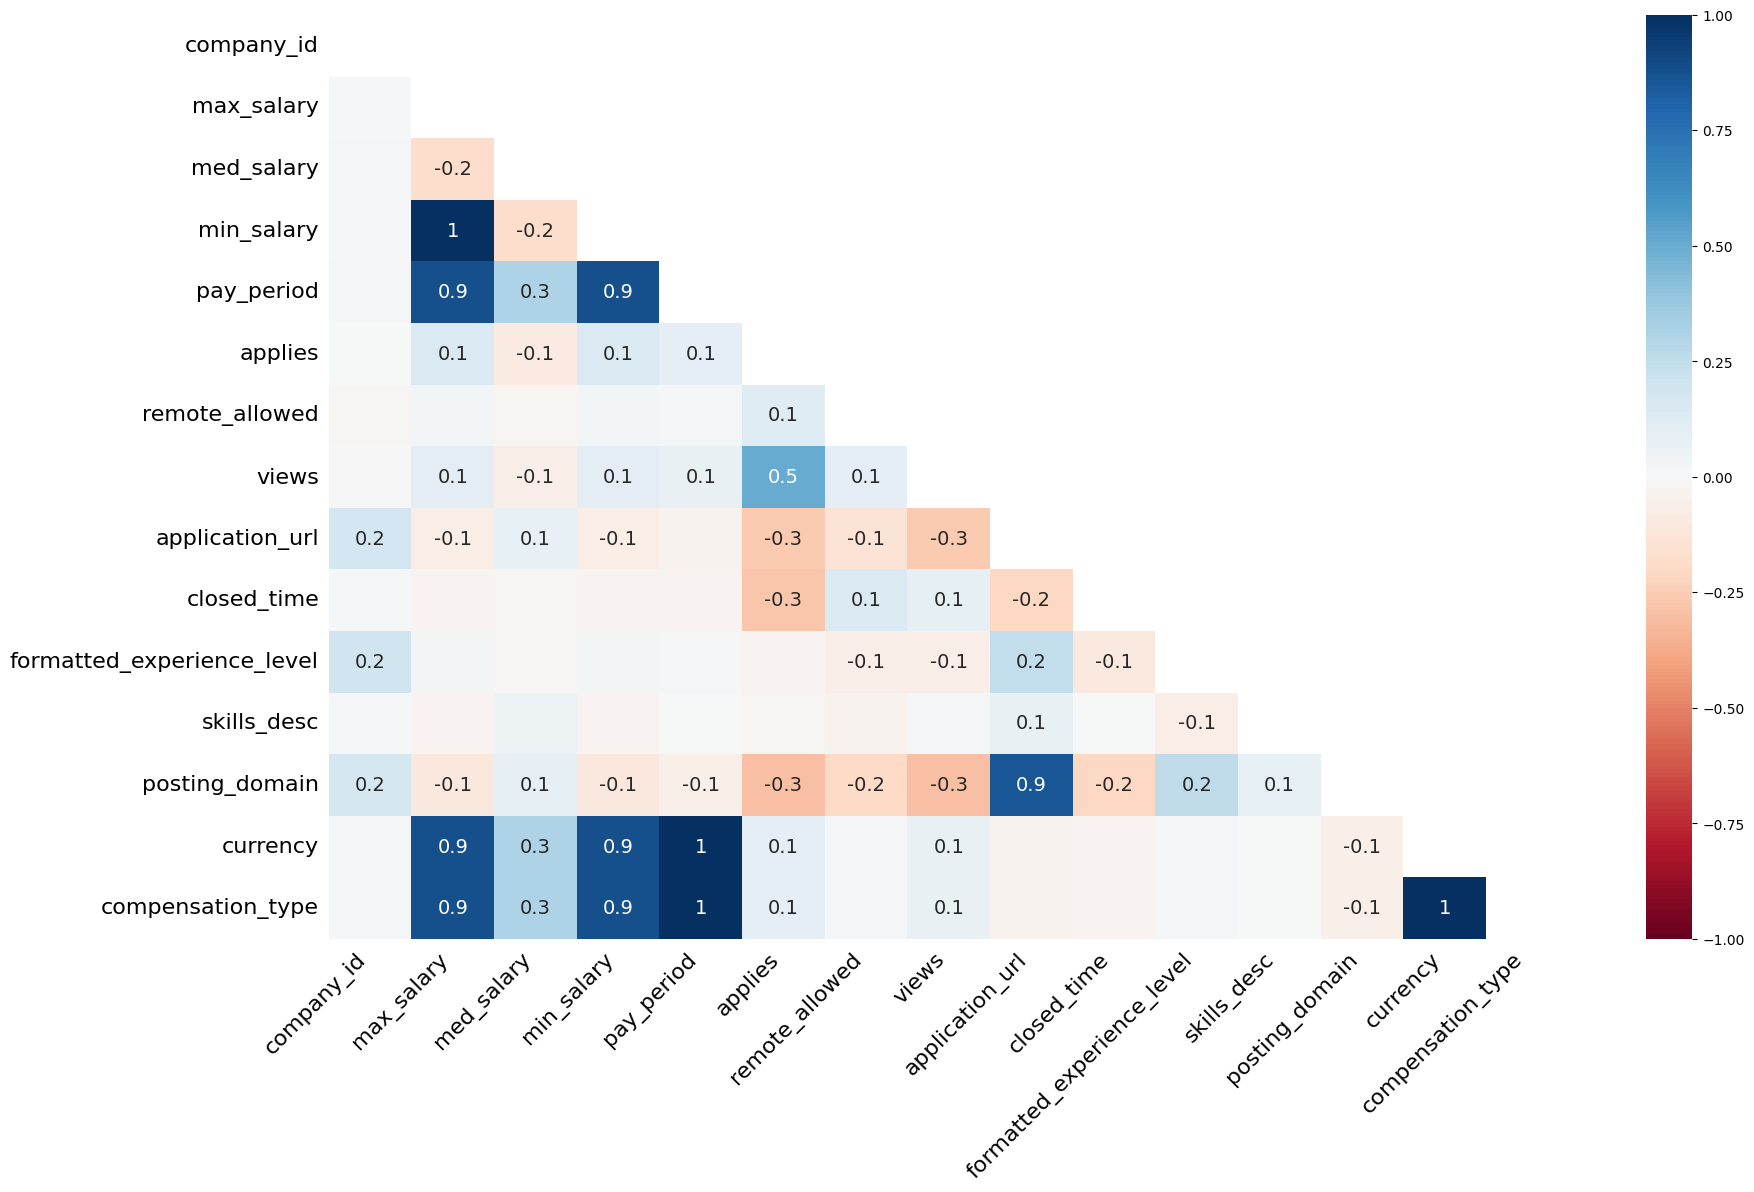

In [122]:
msno.heatmap(df_jobs.toPandas())

In [108]:
df_companies = spark.read.parquet("data/linkedin/companies.parquet")

In [109]:
df_skills = spark.read.csv("data/linkedin/job_skills.csv", header=True, inferSchema=True)

In [110]:
df_industries = spark.read.csv("data/linkedin/company_industries.csv", header=True, inferSchema=True)

In [116]:
df_jobs.join(df_companies, df_jobs.company_id == df_companies.company_id, "inner")\
    .join(df_industries, df_jobs.company_id == df_industries.company_id, "inner")\
    .join(df_skills, df_jobs.job_id == df_skills.job_id, "inner" )\
        .show()

+----------+----------+--------------------+----------+----------+----------+----------+-------------------+--------------------+-------+--------------------+--------------+-----+--------------------+--------------------+----------------+------+-----------+--------------------------+-----------+-----------+-----------------+---------+---------+--------+-----------------+----------+----+--------------------+------------+-----+-------+----------------+--------+--------------------+--------------------+----------+--------------------+----------+---------+
|    job_id|company_id|               title|max_salary|med_salary|min_salary|pay_period|formatted_work_type|            location|applies|original_listed_time|remote_allowed|views|     job_posting_url|     application_url|application_type|expiry|closed_time|formatted_experience_level|skills_desc|listed_time|   posting_domain|sponsored|work_type|currency|compensation_type|company_id|name|         description|company_size|state|country|    

## Spark SQL

In [123]:
df_jobs.createOrReplaceTempView("jobs")
df_companies.createOrReplaceTempView("companies")
df_industries.createOrReplaceTempView("industries")
df_skills.createOrReplaceTempView("skills")

In [125]:
spark.sql("select * from jobs").show()

+----------+-----------+--------------------+----------+----------+----------+----------+-------------------+--------------------+-------+--------------------+--------------+-----+--------------------+--------------------+------------------+-------+-----------+--------------------------+-----------+-----------+--------------------+---------+---------+--------+-----------------+
|    job_id| company_id|               title|max_salary|med_salary|min_salary|pay_period|formatted_work_type|            location|applies|original_listed_time|remote_allowed|views|     job_posting_url|     application_url|  application_type| expiry|closed_time|formatted_experience_level|skills_desc|listed_time|      posting_domain|sponsored|work_type|currency|compensation_type|
+----------+-----------+--------------------+----------+----------+----------+----------+-------------------+--------------------+-------+--------------------+--------------+-----+--------------------+--------------------+----------------

In [135]:
spark.sql("""
    create or replace temp view job_data as 
    select jobs.job_id, jobs.company_id, title, min_salary, formatted_work_type,work_type, name as company_name, industry
    from jobs
    inner join companies on jobs.company_id = companies.company_id
    inner join skills on jobs.job_id = skills.job_id
    inner join industries on jobs.company_id = industries.company_id
    where trim(lower(pay_period)) = 'yearly'
""")

DataFrame[]

In [136]:
spark.sql("select * from job_data").show()

+----------+----------+--------------------+----------+-------------------+---------+------------+--------------------+
|    job_id|company_id|               title|min_salary|formatted_work_type|work_type|company_name|            industry|
+----------+----------+--------------------+----------+-------------------+---------+------------+--------------------+
|3694122103|    1009.0|Application Archi...|  102000.0|          Full-time|FULL_TIME|         IBM|Information Techn...|
|3694122103|    1009.0|Application Archi...|  102000.0|          Full-time|FULL_TIME|         IBM|Information Techn...|
|3694122103|    1009.0|Application Archi...|  102000.0|          Full-time|FULL_TIME|         IBM|Information Techn...|
|3694122103|    1009.0|Application Archi...|  102000.0|          Full-time|FULL_TIME|         IBM|Information Techn...|
|3694122103|    1009.0|Application Archi...|  102000.0|          Full-time|FULL_TIME|         IBM|Information Techn...|
|3694122103|    1009.0|Application Archi

In [139]:
spark.sql("""
select industry, avg(min_salary) as avg_min_salary, count(distinct(job_id)) as qd_jobs, count(job_id) as q_job
from job_data
group by 1
order by 3 desc
""").show(truncate=False)

+----------------------------------+------------------+-------+-----+
|industry                          |avg_min_salary    |qd_jobs|q_job|
+----------------------------------+------------------+-------+-----+
|Staffing & Recruiting             |94833.37422917625 |751    |19927|
|Computer Software                 |129376.51349584837|408    |41371|
|Information Technology & Services |74292.66945441886 |378    |29647|
|Financial Services                |89760.94852617686 |192    |2338 |
|Hospital & Health Care            |95138.89232685967 |175    |3124 |
|Higher Education                  |57459.988149401936|97     |4505 |
|Insurance                         |75755.1209398756  |94     |1449 |
|Retail                            |97866.84291537986 |67     |1688 |
|Transportation/Trucking/Railroad  |87265.44966442953 |65     |1261 |
|Human Resources                   |99260.69489924434 |64     |3180 |
|Management Consulting             |85852.88429752066 |62     |728  |
|Law Practice       

In [141]:
spark.sql("""
select distinct *
from job_data
where trim(industry) in ('Computer Software','Information Technology & Services')
""").show(truncate=False)

+----------+-----------+----------------------------------------------------------+----------+-------------------+---------+---------------------------+---------------------------------+
|job_id    |company_id |title                                                     |min_salary|formatted_work_type|work_type|company_name               |industry                         |
+----------+-----------+----------------------------------------------------------+----------+-------------------+---------+---------------------------+---------------------------------+
|3699081698|1403.0     |Cyber Threat Intelligence Analyst                         |81800.0   |Full-time          |FULL_TIME|Booz Allen Hamilton        |Information Technology & Services|
|3693596514|1586.0     |Area Manager II - Bloomington, CA                         |61400.0   |Full-time          |FULL_TIME|Amazon                     |Computer Software                |
|3701369503|1.8312164E7|Founding Account Executive               

In [153]:
df2 = spark.sql("""
select distinct title, cast(min_salary as int) as min_salary, cast(company_id as string) as company_id, company_name, industry
--select *
from job_data
where trim(industry) in ('Computer Software','Information Technology & Services')
and lower(title) like '%data%engineer%'
""")

In [156]:
df2.write.parquet("linkedin_proc.parquet")

In [157]:
spark.read.parquet("linkedin_proc.parquet").show()

+--------------------+----------+-----------+-------------------+--------------------+
|               title|min_salary| company_id|       company_name|            industry|
+--------------------+----------+-----------+-------------------+--------------------+
|Software Engineer...|    150000|  3653845.0|          Snowflake|   Computer Software|
| Staff Data Engineer|    145000|   595749.0|          EnergyHub|   Computer Software|
|Software Engineer...|    150000|  3653845.0|          Snowflake|   Computer Software|
|Solution Architec...|    140000|   157240.0|          Capgemini|Information Techn...|
|Data Engineer, Go...|    115000|     1441.0|             Google|   Computer Software|
|Senior Data Engineer|    160000|1.8945668E7|      Community.com|   Computer Software|
|Senior Data Engineer|    160000|  3215834.0|            aquesst|Information Techn...|
|Senior Azure Data...|    120000|   101899.0|         HomeSphere|Information Techn...|
|Implementation Da...|     88800|  2681277.